In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_excel('data.xlsx', index_col=0)
dataset.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [3]:
dataset.shape

(4804, 30)

<AxesSubplot:title={'center':'Correlation Matrix'}>

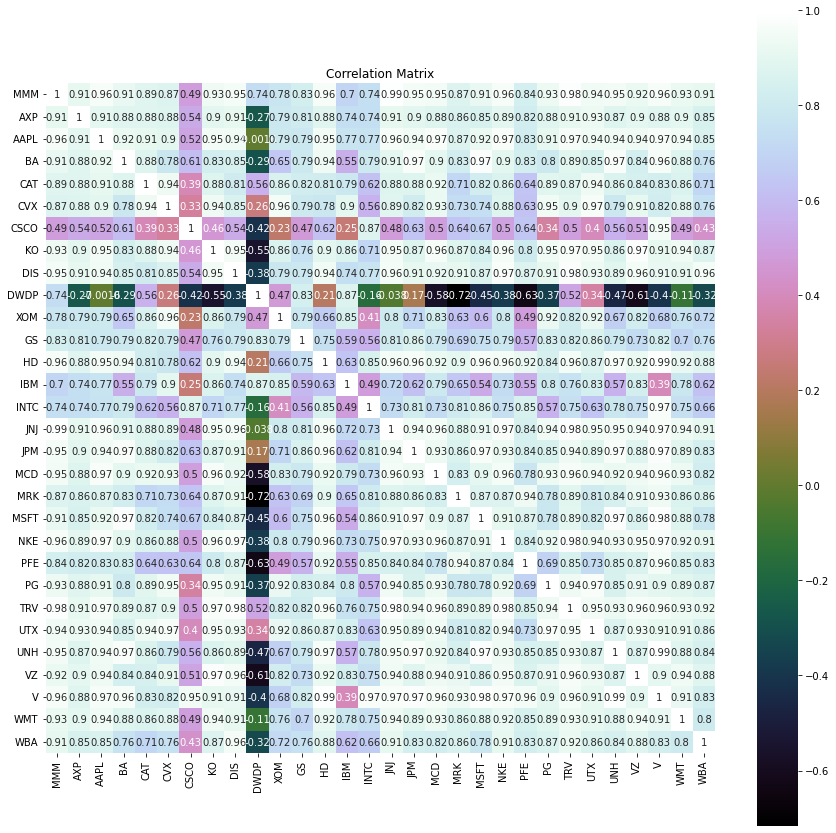

In [4]:
correlation = dataset.corr()
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True, cmap='cubehelix')

In [5]:
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [6]:
#drop those with more than 30% missing values
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
dataset.drop(labels=drop_list, axis=1, inplace=True)

In [7]:
dataset.shape

(4804, 28)

In [8]:
#fill the NAs with the mean of the columns
dataset=dataset.fillna(method='ffill')

dataset= dataset.dropna(axis=0)

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.52222,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.89986,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354


In [10]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1) #Computes the percentage change
                                    #from the immediately previous row by
                                    #default. This is useful in comparing 
                                    #the percentage of change in a time
                                    #series of elements.'''

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [11]:
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns =\
datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)

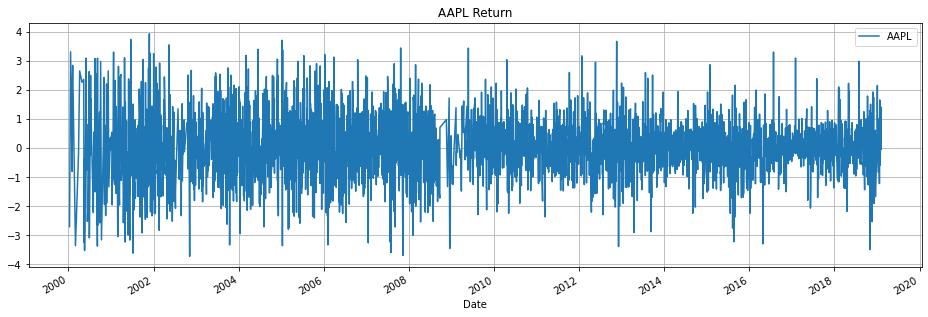

In [12]:
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

In [13]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponent=pca.fit(X_train)

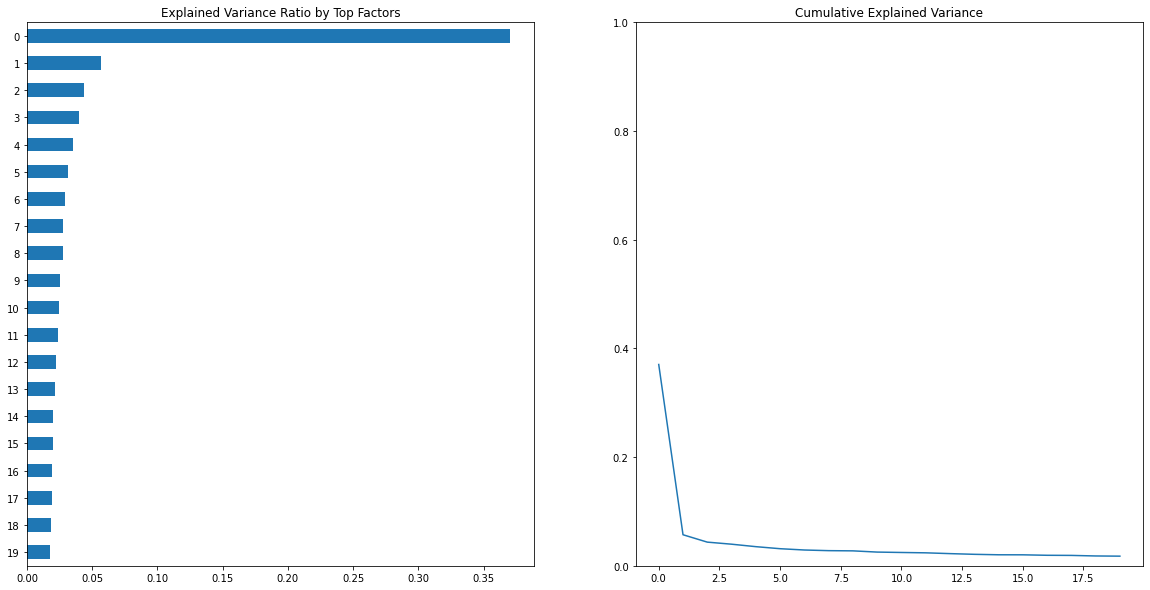

In [15]:
#charts show the number of principal components and the variance explained by each
NumEigenvalues=20
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()
Series1.plot.barh(title='Explained Variance Ratio by Top Factors', ax=axes[0]);
Series1.plot(ylim=(0,1), ax=axes[1], title='Cumulative Explained Variance');

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

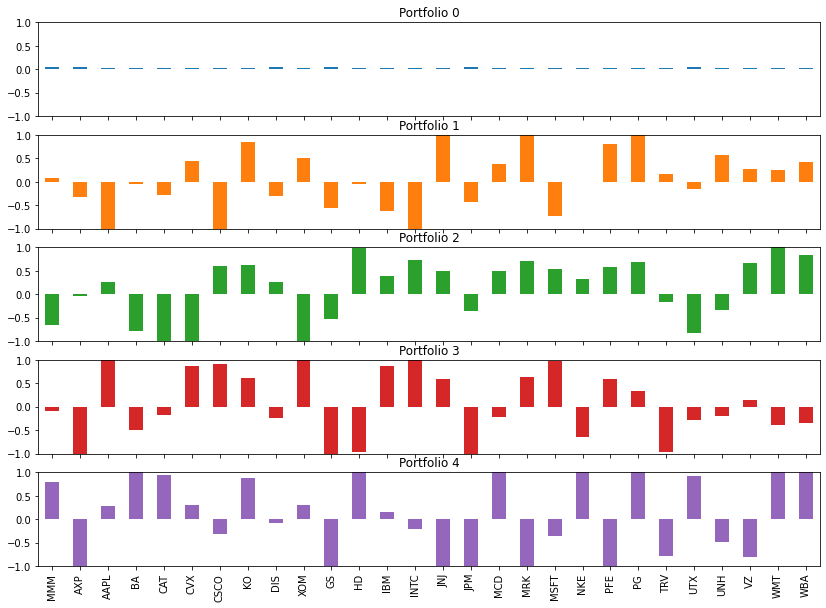

In [16]:
def PCWeights():
    #Principal Components (PC) weights for each 28 PCs
    weights = pd.DataFrame()
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = \
        pca.components_[i] / sum(pca.components_[i])
    weights = weights.values.T
    return weights

weights=PCWeights()
sum(pca.components_[0])

NumComponents=5
topPortfolios = pd.DataFrame(pca.components_[:NumComponents],\
columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), \
figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<AxesSubplot:>

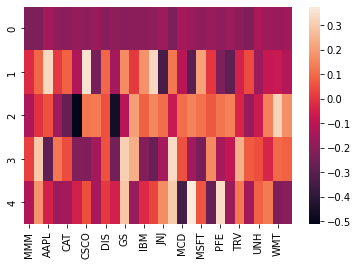

In [17]:
sns.heatmap(topPortfolios)

# Finding the best eigen portfolio.

In [18]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #0 with the highest Sharpe. Return 11.47%,      vol = 13.31%, Sharpe = 0.86
     Return       Vol    Sharpe
0  0.114739  0.133133  0.861838
7  0.095771  0.693481  0.138102
5  0.100020  0.844943  0.118375
1  0.056561  0.670429  0.084366
2 -0.106559  0.858820 -0.124076


C:\Users\mehak\AppData\Local\Temp/ipykernel_7256/1356574605.py:10: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1


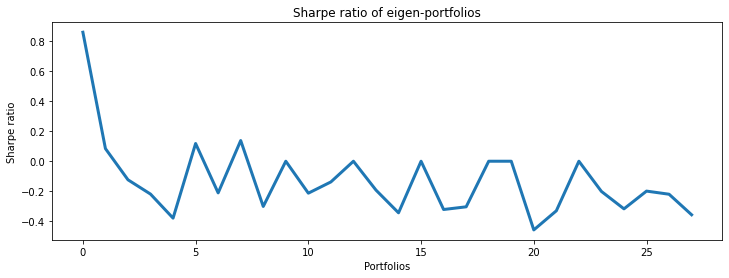

In [19]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, \
        index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),\
        index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
    
     # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)
    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%,\
      vol = %.2f%%, Sharpe = %.2f' %
      (highest_sharpe,
       annualized_ret[highest_sharpe]*100,
       annualized_vol[highest_sharpe]*100,
       sharpe_metric[highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')
    
    results = pd.DataFrame(data={'Return': annualized_ret,'Vol': annualized_vol,'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(5))
    
    plt.show();

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


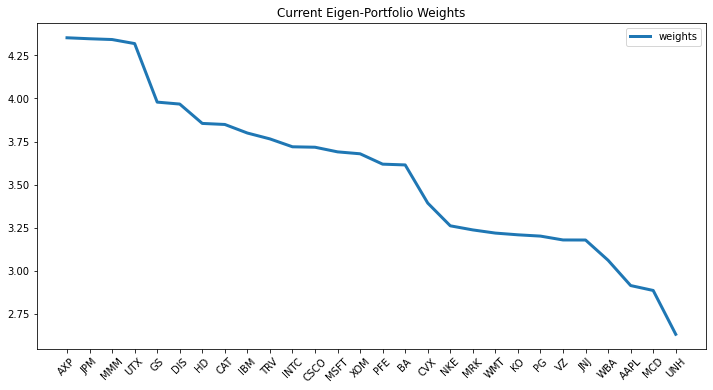

,weights
AXP,4.351486
JPM,4.345819
MMM,4.341287
UTX,4.317801
GS,3.978690
...,...
JNJ,3.179799
WBA,3.062387
AAPL,2.916042
MCD,2.887569


In [20]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

backtest this algorithm on the test set.
For the top performers we look at the 3rd- and 4th-ranked eigen portfolios (Portfolios 5
and 1), while the worst performer reviewed was ranked 19th (Portfolio 14)

Current Eigen-Portfolio:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


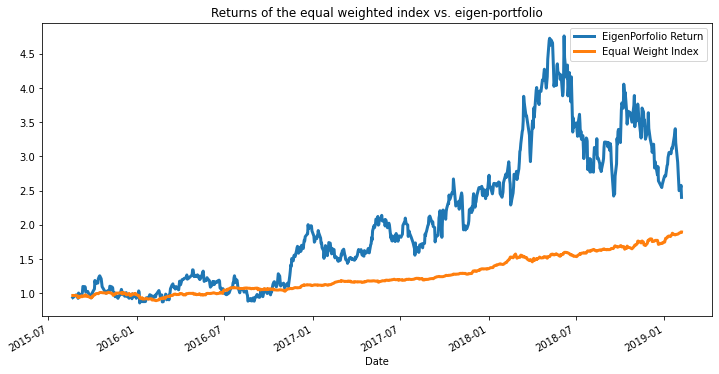

Current Eigen-Portfolio:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


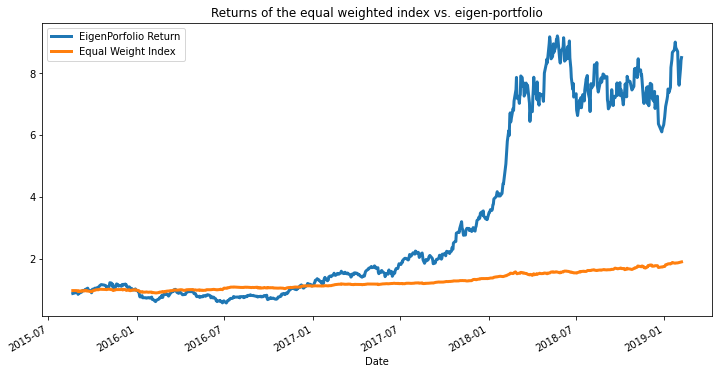

Current Eigen-Portfolio:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


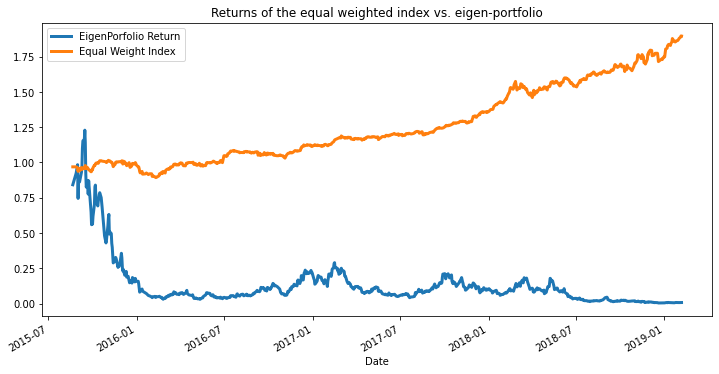

In [21]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])